## **Generating Important Business Insights For Bimbo**

By  

Cosme Amaro Bautista  
Diego Alonso Bugarin Estrada  
José Eduardo López Romero  
Santiago Ortiz Pérez  

Rennes School of Business, December 2023

## Project Description

Aqui poner project description.

## Data Description

* X
* Y
* Z

## Libraries Used, Data File Reading and General Information from Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
plt.style.use('ggplot')

In [3]:
df_products = pd.read_csv('data/ags_data_processed.csv', index_col=0)
df_clients = pd.read_csv('data/clients_ags_processed.csv', index_col=0)
df = pd.merge(df_products,df_clients,on='Cliente_ID',how='inner')
df.head(5)

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreProducto,NombreProductoCat,Category,Town,Grouped_Demanda,piece_amount,weight_grams,NombreCliente,client_type
0,3,1347,1,900,4711525,1064,8,133.36,0,0.0,8,Panque Marmol 255g BIM 1064,Panque Marmol,59,2251 AGUASCALIENTES NORTE,835,1,255,NO IDENTIFICADO,NI
1,3,1347,1,900,4711525,1146,30,641.70,0,0.0,30,Pan Integral 675g BIM 1146,Pan Integral,69,2251 AGUASCALIENTES NORTE,7449,1,675,NO IDENTIFICADO,NI
2,3,1347,1,900,4711525,1150,18,251.28,0,0.0,18,Medias Noches 8p 340g BIM 1150,Medias Noches,18,2251 AGUASCALIENTES NORTE,7944,8,340,NO IDENTIFICADO,NI
3,3,1347,1,900,4711525,1160,9,169.74,0,0.0,9,Bimbollos 8p 450g BIM 1160,Bimbollos,71,2251 AGUASCALIENTES NORTE,3058,8,450,NO IDENTIFICADO,NI
4,3,1347,1,900,4711525,1169,21,396.06,0,0.0,21,Bimbollos Extra 6p 480g BIM 1169,Bimbollos Extra,75,2251 AGUASCALIENTES NORTE,2640,6,480,NO IDENTIFICADO,NI


In [4]:
df.drop(labels=['Ruta_SAK','Cliente_ID','Producto_ID','Grouped_Demanda','Town','Venta_hoy','Dev_proxima'], axis=1,inplace=True)
df.columns = map(str.lower, df.columns)
df.rename(columns={'semana':'week','agencia_id':'agency_number','canal_id':'channel_id','venta_uni_hoy':'unit_sales',\
                    'dev_uni_proxima':'unit_return','nombreproducto':'full_product_name','nombreproductocat':'product_category',\
                    'category':'numerical_category','nombrecliente':'client_name'}, inplace=True)

Unnecessary columns dropped, they are either part of a join from previous databases, repeated information, or columns added by the team for other purposes. Also translated and renamed columns to make further tables more readable.

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264976 entries, 0 to 1264975
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   week                1264976 non-null  int64 
 1   agency_number       1264976 non-null  int64 
 2   channel_id          1264976 non-null  int64 
 3   unit_sales          1264976 non-null  int64 
 4   unit_return         1264976 non-null  int64 
 5   demanda_uni_equil   1264976 non-null  int64 
 6   full_product_name   1264976 non-null  object
 7   product_category    1264976 non-null  object
 8   numerical_category  1264976 non-null  int64 
 9   piece_amount        1264976 non-null  int64 
 10  weight_grams        1264976 non-null  int64 
 11  client_name         1264976 non-null  object
 12  client_type         1264976 non-null  object
dtypes: int64(9), object(4)
memory usage: 454.2 MB


Aquí va la interpretación de los datos de arriba.
Ex. Data does not need cleaning, amount Categorical Cols,amount Numerical Cols

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
week,1264976.0,5.918738,2.010769,3.0,4.0,6.0,8.0,9.0
agency_number,1264976.0,1351.023545,23.366863,1347.0,1347.0,1351.0,1351.0,1974.0
channel_id,1264976.0,1.340101,1.486761,1.0,1.0,1.0,1.0,11.0
unit_sales,1264976.0,7.443712,20.125248,0.0,2.0,3.0,7.0,3219.0
unit_return,1264976.0,0.109474,2.768760,0.0,0.0,0.0,0.0,1410.0
demanda_uni_equil,1264976.0,7.369994,19.741478,0.0,2.0,3.0,7.0,3191.0
numerical_category,1264976.0,158.029407,160.021492,3.0,71.0,90.0,193.0,1028.0
piece_amount,1264976.0,4.277906,6.756856,0.0,1.0,2.0,6.0,200.0
weight_grams,1264976.0,182.340926,221.311309,5.0,75.0,106.0,255.0,31000.0


Interpretacion de datos estadisticos.
Ex.  
Donde se situa la mayoria de ventas a partir de info de semana.  
Ventas...  
Devoluciones...  
Etc...

In [7]:
df.describe(include=['object']).T

,count,unique,top,freq
full_product_name,1264976,475,Nito 1p 62g Central BIM 2425,58363
product_category,1264976,288,Nito,60659
client_name,1264976,7378,NO IDENTIFICADO,226506
client_type,1264976,13,Individual,769064


Interpretacion de datos...  
Que significan los valores unicos...  
Valores más comunes en el df por categoria significan...  

In [8]:
df.nunique()

week                     7
agency_number            5
channel_id               6
unit_sales             628
unit_return            118
demanda_uni_equil      625
full_product_name      475
product_category       288
numerical_category     288
piece_amount            28
weight_grams           170
client_name           7378
client_type             13
dtype: int64

Unique Values in each column.

## Data Analization

### Sales and Returns per week in the state, table and visualization in graph.

In [37]:
#Grouping by week and client type to find out unit sales of each.
scw_pivot = pd.pivot_table(df,index=['client_type'],columns=['week'],values=['unit_sales'],aggfunc=np.sum)
scw_pivot = scw_pivot.reindex(scw_pivot['unit_sales'].sort_values(by=3,ascending=False).index)
scw_pivot.drop(labels=['NI'],axis=0,inplace=True)
scw_pivot = scw_pivot.T.reset_index()
scw_pivot.set_index('week',inplace=True)
scw_pivot = scw_pivot.iloc[:,1:]
other_clients_pivot = scw_pivot.iloc[:,-6:].sum(axis=1)
scw_pivot = scw_pivot.iloc[:,:-6]
scw_pivot['Other'] = other_clients_pivot
#Percentage of sales by client type
total_sales = df[df['client_type'] != 'NI'].groupby('week')['unit_sales'].sum()
swc_prcnt = scw_pivot.div(total_sales,axis=0)*100

swc_prcnt

client_type,Individual,Small Store,Big Store,OXXO Store,Medium Store,Consignment,Other
week,,,,,,,
3,64.205370,13.602962,5.710231,5.481267,4.326751,2.989901,3.683519
4,62.836437,13.544053,6.454732,5.513354,4.144951,4.058297,3.448177
5,64.528332,13.536725,6.264344,5.550508,4.089374,2.990821,3.039897
6,64.047595,13.246326,7.491409,5.154896,4.173992,2.585349,3.300434
7,63.281817,13.784269,7.172512,4.812618,4.186072,3.261666,3.501046
8,63.514381,13.436638,7.115579,5.079543,4.170546,3.128523,3.554789
9,62.746757,13.164712,7.326119,5.699638,4.188449,3.171745,3.702578


In [39]:
#Grouping by week and client type to find out unit returns of each client type.
rcw_pivot = pd.pivot_table(df,index=['client_type'],columns=['week'],values=['unit_return'],aggfunc=np.sum)
rcw_pivot = rcw_pivot.reindex(rcw_pivot['unit_return'].sort_values(by=3,ascending=False).index)
rcw_pivot.drop(labels=['NI'],axis=0,inplace=True)
rcw_pivot = rcw_pivot.T.reset_index()
rcw_pivot.set_index('week',inplace=True)
rcw_pivot = rcw_pivot.iloc[:,1:]
other_clients_pivot = rcw_pivot.iloc[:,-6:].sum(axis=1)
rcw_pivot = rcw_pivot.iloc[:,:-6]
rcw_pivot['Other'] = other_clients_pivot
rcw_pivot

#Percentage of returns by client type.
total_returns = df[df['client_type'] != 'NI'].groupby('week')['unit_return'].sum()
rwc_prcnt = rcw_pivot.div(total_returns,axis=0)*100

rwc_prcnt


client_type,Individual,Consignment,Small Store,Big Store,Medium Store,Restaurant,Other
week,,,,,,,
3,63.966134,13.181443,12.637665,4.253855,4.074890,0.812225,1.073789
4,55.295468,24.126572,9.802356,7.341785,2.520463,0.708724,0.204632
5,68.749609,9.623196,11.372868,5.480222,4.217959,0.231207,0.324939
6,67.641314,12.000977,12.849469,3.912831,2.203638,1.074350,0.317422
7,60.436448,10.517757,11.530189,6.861459,3.278603,7.013587,0.361958
8,69.502811,7.045789,13.895105,5.015554,3.307319,0.551220,0.682203
9,64.492839,11.223292,11.505048,6.914769,4.390702,1.027236,0.446114


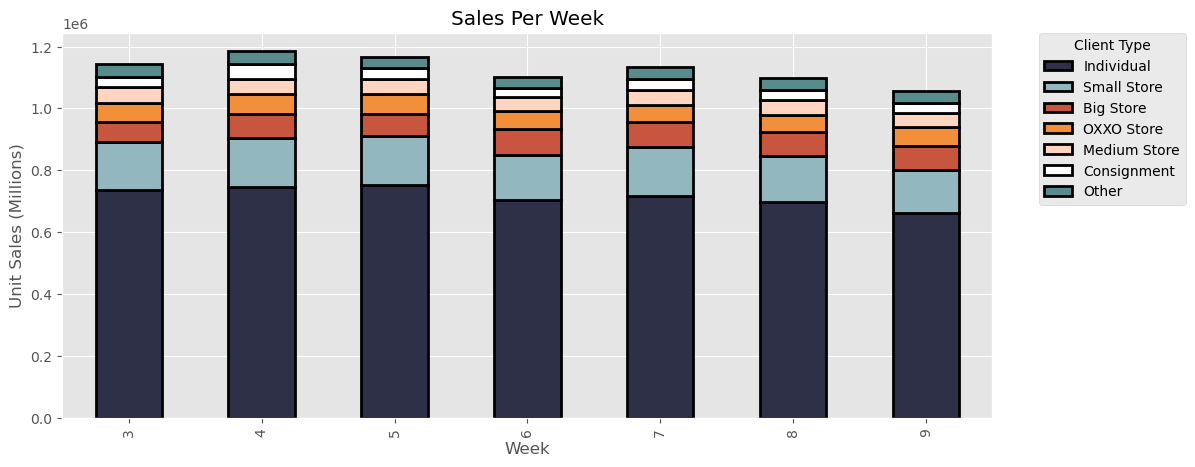

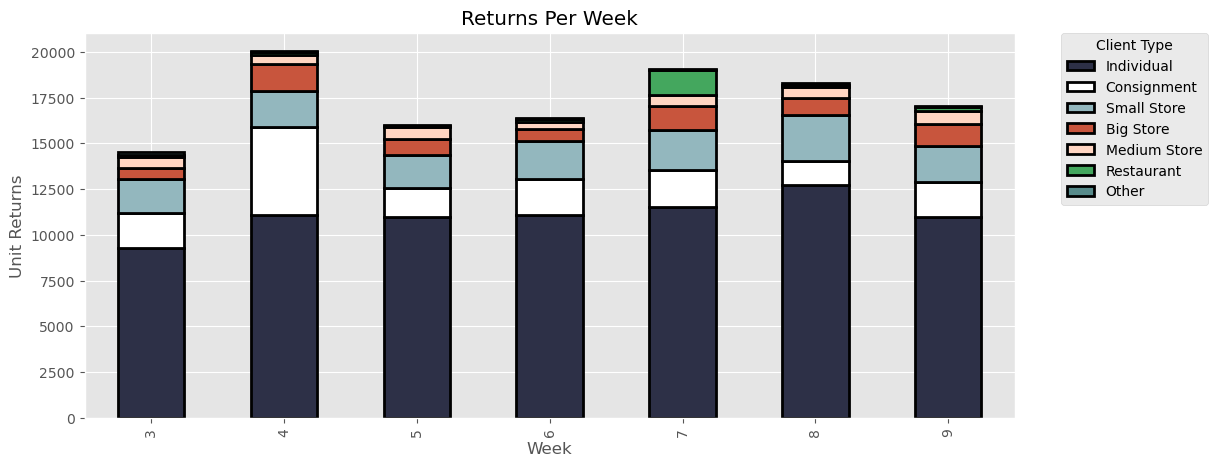

In [51]:
scw_pivot.plot(kind='bar',stacked=True,title='Sales Per Week',ec='black',lw=2,\
               color=['#2d3047','#93b7be','#c8553d','#f28f3b','#ffd5c2','#ffffff','#588b8b'],\
               xlabel='Week', ylabel='Unit Sales (Millions)',figsize=(12,5))


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title='Client Type')
plt.show()

rcw_pivot.plot(kind='bar',stacked=True,title='Returns Per Week',ec='black',lw=2,\
               color=['#2d3047','#ffffff','#93b7be','#c8553d','#ffd5c2','#44a75e','#588b8b'],\
               xlabel='Week', ylabel='Unit Returns',figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title='Client Type')
plt.show()

client_type,Individual,Small Store,Big Store,OXXO Store,Medium Store,Consignment,Other
week,,,,,,,
3,64.205370,13.602962,5.710231,5.481267,4.326751,2.989901,3.683519
4,62.836437,13.544053,6.454732,5.513354,4.144951,4.058297,3.448177
5,64.528332,13.536725,6.264344,5.550508,4.089374,2.990821,3.039897
6,64.047595,13.246326,7.491409,5.154896,4.173992,2.585349,3.300434
7,63.281817,13.784269,7.172512,4.812618,4.186072,3.261666,3.501046
8,63.514381,13.436638,7.115579,5.079543,4.170546,3.128523,3.554789
9,62.746757,13.164712,7.326119,5.699638,4.188449,3.171745,3.702578


Hypothesis:
The proportion of returns made by Big Stores is the same as the returns made by Big Stores.

### Most popular products in stores around the state.

C:\Users\perez\AppData\Local\Temp\ipykernel_24912\4000086505.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_df = product_df.groupby('product_category').sum().sort_values(by='unit_sales',ascending=False)


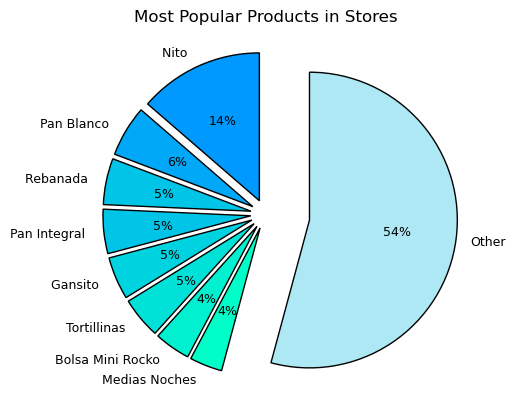

In [120]:
top = 8

product_df = df[['client_type','product_category','unit_sales','unit_return']]
product_df = product_df[product_df['client_type'].isin(['Big Store','Small Store','Medium Store'])]
product_df = product_df.groupby('product_category').sum().sort_values(by='unit_sales',ascending=False)
product_df = product_df.T
other_products = product_df.iloc[:,top:].sum(axis=1)
product_df = product_df.iloc[:,:top]
product_df['Other'] = other_products
product_df= product_df.T


plt.pie(product_df['unit_sales'],labels=product_df.index,autopct='%1.0f%%', startangle=90,\
        explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,.3],colors=['#0099ff','#00a8f7','#00c5e7','#00c5e7','#00d3e0','#00e2d8','#00f0d0','#00ffc8','#ade8f4']\
        ,wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True},
        textprops={'fontsize': 9, 'color': 'k'}
)

plt.title('Most Popular Products in Stores',fontsize=12)

plt.show()

### Products with highest return ratio.

In [135]:
df_products = df[['product_category','unit_sales','unit_return']]
df_products = df_products.groupby('product_category').sum()
#drop rows with 0 unit_sales
df_products.drop(df_products[df_products['unit_sales'] == 0].index,inplace=True)
df_products['return_ratio'] = df_products['unit_return']/df_products['unit_sales']
df_products.sort_values(by='return_ratio',ascending=False,inplace=True)
df_products = df_products['return_ratio'].head(10)

df_products

product_category
Dona                       69.923077
Fanta Lata                 57.000000
Bimbunuelos con Canela      5.326316
Galleta Cereleta            2.666667
Besos de Nuez               2.262500
Aparas Panettone            1.000000
Surtido Fina Variedad       1.000000
ActiFresh Yerbabuena        1.000000
Figatza 1 Metro             0.617021
Orejitas con Canela         0.602564
Name: return_ratio, dtype: float64

### Products that where never sold during the 9 weeks.

In [143]:
df_products = df[['product_category','unit_sales']]
df_products = df_products.groupby('product_category').sum()
#drop rows with 0 unit_sales
df_products.drop(df_products[df_products['unit_sales'] != 0].index,inplace=True)
df_products

,unit_sales
product_category,
ActiFresh Menta,0
Bubulubu,0
Canelitas Navidad,0
Chocochips 100 cal 8P,0
Galleton Chocolate,0
Lata Redonda Mixta Generico,0
Principe mas Navigalleta 42,0
Twin Pack Thins Multig,0
